In [1]:
#Exploration of New product - July 2021
import datetime as dt
import glob
import netCDF4 as nc
import numpy as np
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cmocean
from gsw import sigma0

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config["data_dir"] = './cartopy_shapefiles'

os.getcwd()

'/home1/datahome/epauthen'

In [16]:
ds = xr.open_dataset('/home/datawork-lops-bluecloud/osnet/out_data/produit_201001.nc')

ds = ds.assign_coords({'PRES_INTERPOLATED': (['PRES_INTERPOLATED'], np.arange(0,1001))})
ds = ds.sortby('lon')
ds.load()


<xarray.Dataset>
Dimensions:            (PRES_INTERPOLATED: 1001, lat: 110, lon: 186, time: 31)
Coordinates:
    mask               (time, lat, lon) float64 nan nan nan nan ... 1.0 1.0 1.0
  * time               (time) datetime64[ns] 2010-01-01 ... 2010-01-31
  * lat                (lat) float64 23.06 23.28 23.49 ... 49.15 49.45 49.75
  * lon                (lon) float64 -78.2 -77.94 -77.68 ... -30.48 -30.22
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 0 1 2 3 4 ... 997 998 999 1000
Data variables:
    SSS                (time, lat, lon) float32 nan nan nan ... 34.92 34.45
    MDT                (time, lat, lon) float64 nan nan nan ... -0.1633 -0.1546
    SST                (time, lat, lon) float32 nan nan nan ... 9.048 9.916
    SLA                (time, lat, lon) float64 nan nan nan ... -0.1235 -0.07813
    UGOS               (time, lat, lon) float64 nan nan nan ... 0.2358 0.1989
    VGOS               (time, lat, lon) float64 nan nan nan ... 0.19 0.2712
    UGOSA              (time, lat, lon) float64 nan nan nan ... 0.1894 0.154
    VGOSA              (time, lat, lon) float64 nan nan nan ... 0.1608 0.2403
    BATHY              (time, lat, lon) float64 nan nan ... -3.299e+03
    weekOfYear         (time, lat, lon) float64 nan nan nan nan ... 4.0 4.0 4.0
    TEMP_predicted     (PRES_INTERPOLATED, time, lat, lon) float64 nan ... 3.869
    PSAL_predicted     (PRES_INTERPOLATED, time, lat, lon) float64 nan ... 34.9

In [ ]:
#Map of TS
proj=ccrs.PlateCarree()
land_feature = cfeature.NaturalEarthFeature(
    category='physical', name='land', scale='50m', facecolor=[0.9375, 0.9375, 0.859375])
extent = np.array([-80, -30, 23, 47.5])
subplot_kw = {'projection': proj, 'extent': extent}

t = 0
for t in np.arange(0,len(ds.time)):
    d = 0
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)
    ds['SST'].isel(time = t).plot(ax=ax[0,0],vmin = 6,vmax = 28,
                      cmap=cmocean.cm.thermal,center=False,
                      transform=ccrs.PlateCarree(),
                      cbar_kwargs={"shrink": 0.7},
                      robust=True)
    ax[0,0].contour(ds['lon'],ds['lat'],ds['SST'].isel(time=t),colors = "black",linewidths = 1)
    ax[0,0].add_feature(land_feature, edgecolor='black')
    gl = ax[0,0].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,linewidth=.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False

    ds['SSS'].isel(time = t).plot(ax=ax[0,1],vmin = 33,vmax = 38,
                      cmap=cmocean.cm.haline,center=False,
                      transform=ccrs.PlateCarree(),
                      cbar_kwargs={"shrink": 0.7},
                      robust=True)
    ax[0,1].contour(ds['lon'],ds['lat'],ds['SSS'].isel(time=t),colors = "black",linewidths = 1)
    ax[0,1].add_feature(land_feature, edgecolor='black')
    gl = ax[0,1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,linewidth=.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False

    ds['TEMP_predicted'].isel(time = t,PRES_INTERPOLATED = d).plot(ax=ax[1,0],vmin = 6,vmax = 28,
                      cmap=cmocean.cm.thermal,center=False,
                      transform=ccrs.PlateCarree(),
                      cbar_kwargs={"shrink": 0.7},
                      robust=True)
    ax[1,0].contour(ds['lon'],ds['lat'],ds['TEMP_predicted'].isel(time=t,PRES_INTERPOLATED = d),colors = "black",linewidths = 1)
    ax[1,0].add_feature(land_feature, edgecolor='black')
    gl = ax[1,0].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,linewidth=.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False

    ds['PSAL_predicted'].isel(time = t,PRES_INTERPOLATED = d).plot(ax=ax[1,1],vmin = 33,vmax = 38,
                      cmap=cmocean.cm.haline,center=False,
                      transform=ccrs.PlateCarree(),
                      cbar_kwargs={"shrink": 0.7},
                      robust=True)
    ax[1,1].contour(ds['lon'],ds['lat'],ds['PSAL_predicted'].isel(time=t,PRES_INTERPOLATED = d),colors = "black",linewidths = 1)
    ax[1,1].add_feature(land_feature, edgecolor='black')
    gl = ax[1,1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,linewidth=.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False

    (ds['TEMP_predicted'].isel(time = t,PRES_INTERPOLATED = d)-ds['SST'].isel(time = t)).plot(ax=ax[2,0],vmin = -5,vmax = 5,
                      cmap=cmocean.cm.balance,center=0,
                      transform=ccrs.PlateCarree(),
                      cbar_kwargs={"shrink": 0.7},robust = True)
    ax[2,0].add_feature(land_feature, edgecolor='black')
    gl = ax[2,0].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,linewidth=.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False

    (ds['PSAL_predicted'].isel(time = t,PRES_INTERPOLATED = d)-ds['SSS'].isel(time = t)).plot(ax=ax[2,1],vmin = -.7,vmax = .7,
                      cmap=cmocean.cm.balance,center=0,
                      transform=ccrs.PlateCarree(),
                      cbar_kwargs={"shrink": 0.7},robust = True)
    ax[2,1].add_feature(land_feature, edgecolor='black')
    gl = ax[2,1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,linewidth=.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False

    plt.savefig('/home1/datahome/epauthen/Fig_Product/FigTSmaps_%i.png'%t, transparent=False)
    plt.close()
#plt.show()

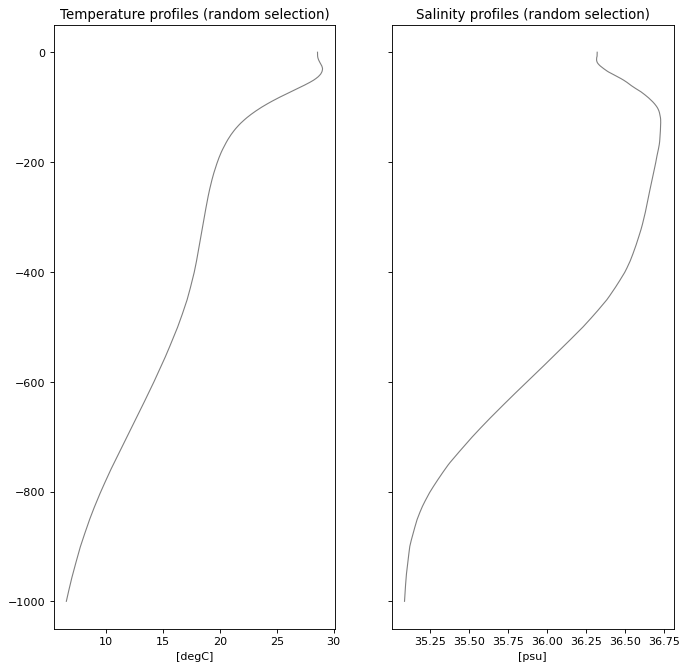

In [20]:
# Random selection of profiles
fig, ax = plt.subplots(nrows=1, ncols=2, sharey='row', figsize=(10,10), dpi=80, facecolor='w', edgecolor='k')
ax[0].plot(ds.TEMP_predicted.isel(time=0,lat=10,lon=10), -ds.PRES_INTERPOLATED, '-', color='gray', linewidth=1)
ax[0].set_title('Temperature profiles (random selection)')
ax[0].set_xlabel('[degC]')

ax[1].plot(ds.PSAL_predicted.isel(time=0,lat=10,lon=10), -ds.PRES_INTERPOLATED, '-', color='gray', linewidth=1)
ax[1].set_title('Salinity profiles (random selection)')
ax[1].set_xlabel('[psu]')

plt.show()

In [18]:
#Plot section with longitude fixed
t = 0
lo = 80
for t in np.arange(0,len(ds.time)):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 5), dpi=120, facecolor='w', edgecolor='k')
    ds['SST'].isel(time = t,lon = lo).plot(ax=ax[0,0],label = "SST")
    ds['TEMP_predicted'].isel(time = t,lon = lo,PRES_INTERPOLATED = 0).plot(ax=ax[0,0],label = "surface TEMP predicted")
    ax[0,0].legend(loc = 'lower left')
    ax[0,0].set_xlim([23, 50])

    ds['SSS'].isel(time = t,lon = lo).plot(ax=ax[0,1],label = "SSS")
    ds['PSAL_predicted'].isel(time = t,lon = lo,PRES_INTERPOLATED = 0).plot(ax=ax[0,1], label = "surface PSAL predicted")
    ax[0,1].legend(loc = 'lower left')
    ax[0,1].set_xlim([23, 50])

    ds['TEMP_predicted'].isel(time = t,lon = lo).plot(ax=ax[1,0],vmin = 6,vmax = 28,
                      cmap=cmocean.cm.thermal,center=False,yincrease=False,
                      cbar_kwargs={"orientation": "horizontal", "shrink": 0.7},
                      robust=True)
    ax[1,0].contour(ds['lat'],ds['PRES_INTERPOLATED'],ds['TEMP_predicted'].isel(time=t,lon = lo),colors = "black",linewidths = 1)
    ax[1,0].set_title('')
    ax[1,0].set_xlim([23, 50])

    ds['PSAL_predicted'].isel(time = t,lon = lo).plot(ax=ax[1,1],vmin = 33,vmax = 38,
                      cmap=cmocean.cm.haline,center=False,yincrease=False,
                      cbar_kwargs={"orientation": "horizontal", "shrink": 0.7},
                      robust=True)
    ax[1,1].contour(ds['lat'],ds['PRES_INTERPOLATED'],ds['PSAL_predicted'].isel(time=t,lon = lo),colors = "black",linewidths = 1)
    ax[1,1].set_title('')
    ax[1,1].set_xlim([23, 50])

    plt.savefig('/home/datawork-lops-bluecloud/osnet/Fig_Product/FigTSsection_lon%i_time%i.png'%(lo,t), transparent=False)
    plt.close()
#plt.show()